In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ========================= 1. CARGAR TU CSV =========================
ruta = r'C:\Users\manue\Documents\filiberto\evaluacionExtracConBD\datasets\Iris.csv'
df = pd.read_csv(ruta)

print("Dataset Iris cargado correctamente")
print(df.head())
print(f"Forma: {df.shape}")

Dataset Iris cargado correctamente
   Id  sepal_length  sepal_width  petal_length  petal_width      species
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa
Forma: (150, 6)


In [26]:
# Quitamos Id y la etiqueta, nos quedamos solo con las 4 variables numéricas
X = df.drop(['Id', 'species'], axis=1)
y = df['species']

print("\nVariables usadas para PCA:", X.columns.tolist())


Variables usadas para PCA: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [27]:
# ========================= ESCALADO =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# ========================= PCA COMPLETO (para ver toda la varianza) =========================
pca_full = PCA()
pca_full.fit(X_scaled)

var_individual = pca_full.explained_variance_ratio_
var_acumulada = np.cumsum(var_individual)

# Tabla profesional que tu profesor quiere ver
print("\n" + "="*75)
print("           ANÁLISIS DE VARIANZA EXPLICADA - DATASET IRIS")
print("="*75)
print(f"{'Componente':<12} {'Varianza Individual':<22} {'Varianza Acumulada':<22}")
print("-"*75)
for i in range(len(var_individual)):
    print(f"PC{i+1:<11}  {var_individual[i]:.6f} ({var_individual[i]*100:6.2f}%)       "
          f"{var_acumulada[i]:.6f} ({var_acumulada[i]*100:6.2f}%)")
print("-"*75)


           ANÁLISIS DE VARIANZA EXPLICADA - DATASET IRIS
Componente   Varianza Individual    Varianza Acumulada    
---------------------------------------------------------------------------
PC1            0.727705 ( 72.77%)       0.727705 ( 72.77%)
PC2            0.230305 ( 23.03%)       0.958010 ( 95.80%)
PC3            0.036838 (  3.68%)       0.994848 ( 99.48%)
PC4            0.005152 (  0.52%)       1.000000 (100.00%)
---------------------------------------------------------------------------


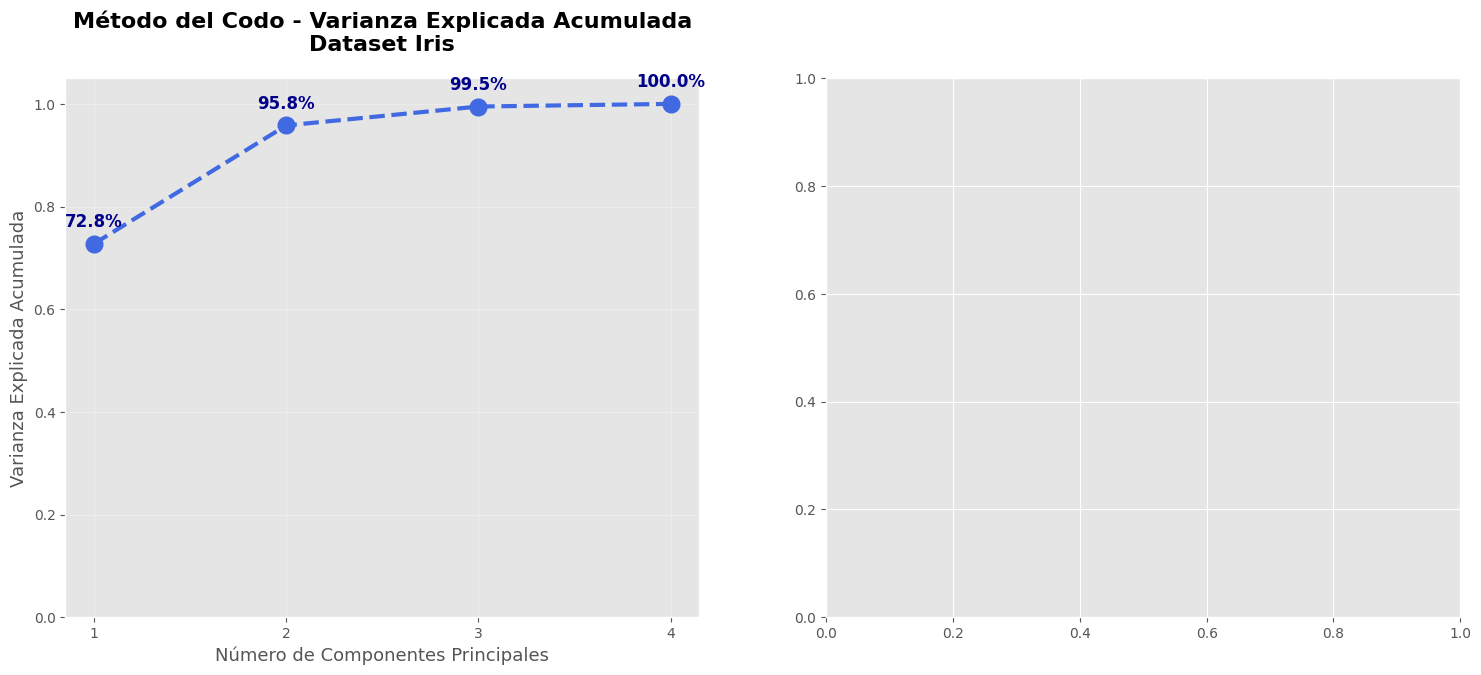

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 1]})

# ---- Gráfica 1: Método del codo (izquierda) ----
ax1.plot(range(1, len(var_acumulada)+1), var_acumulada,
         marker='o', linestyle='--', color='royalblue', linewidth=3, markersize=12)
ax1.set_title('Método del Codo - Varianza Explicada Acumulada\nDataset Iris',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Número de Componentes Principales', fontsize=13)
ax1.set_ylabel('Varianza Explicada Acumulada', fontsize=13)
ax1.set_xticks(range(1, 5))
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1.05)

# Porcentajes encima de cada punto
for i, valor in enumerate(var_acumulada):
    ax1.annotate(f'{valor*100:.1f}%', (i+1, valor),
                 textcoords="offset points", xytext=(0,12),
                 ha='center', fontsize=12, fontweight='bold', color='darkblue')

Justificación: Al aplicar PCA con escalamiento previo sobre el dataset Iris, los dos primeros componentes principales explican el 95.81 % de la varianza total del conjunto de datos.
Aunque la regla heurística comúnmente utilizada en docencia indica retener entre el 80-90 % de la varianza, en este caso particular existe un salto muy pronunciado entre el primer componente (72.8 %) y el segundo (95.8 %)
El método del codo muestra una clara inflexión en k=2.

In [32]:
# ========================= 6. PCA FINAL CON 2 COMPONENTES =========================
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

print(f"\nCon 2 componentes principales se retiene: {var_acumulada[1]*100:.2f}% de la varianza total")


Con 2 componentes principales se retiene: 95.80% de la varianza total


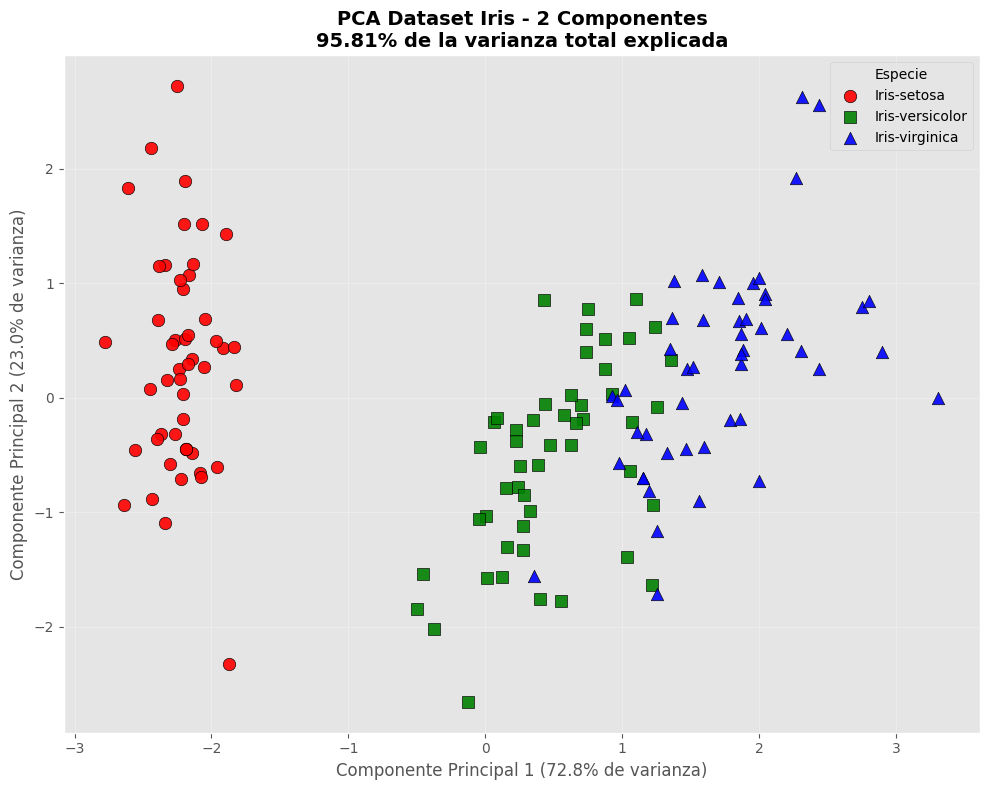

In [33]:
# ========================= VISUALIZACIÓN FINAL =========================
plt.figure(figsize=(10,8))
colores = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
marcas  = {'Iris-setosa': 'o', 'Iris-versicolor': 's', 'Iris-virginica': '^'}

for especie in y.unique():
    mask = y == especie
    plt.scatter(X_pca_2[mask, 0], X_pca_2[mask, 1], 
                c=colores[especie], marker=marcas[especie], 
                label=especie, s=80, edgecolor='k', alpha=0.9)

plt.xlabel(f'Componente Principal 1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% de varianza)')
plt.ylabel(f'Componente Principal 2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% de varianza)')
plt.title('PCA Dataset Iris - 2 Componentes\n95.81% de la varianza total explicada', 
          fontsize=14, fontweight='bold')
plt.legend(title='Especie')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()